In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

user_ratings = pd.read_csv( '.\\user_ratings_cleaned.csv',)

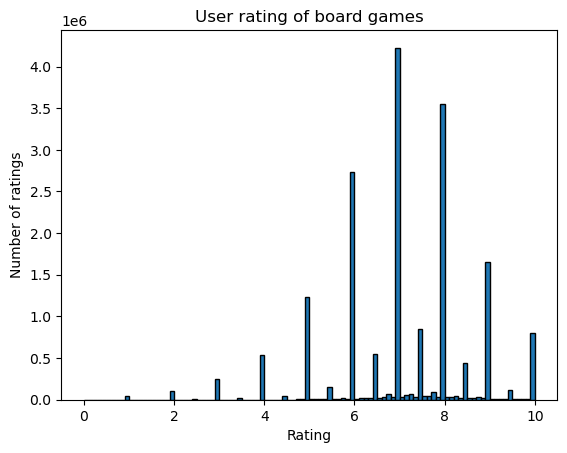

In [2]:
#number of ratings histogram

user_ratings.rename(columns={'Rating' : 'User rating of board games'}, inplace=True)
hist = user_ratings.hist(column="User rating of board games", bins=100, sharex=True, sharey=True, edgecolor='black', grid=False)
for ax in hist.flatten():
    ax.set_xlabel("Rating")
    ax.set_ylabel("Number of ratings")
    
user_ratings.rename(columns={'User rating of board games' : 'Rating'}, inplace=True)

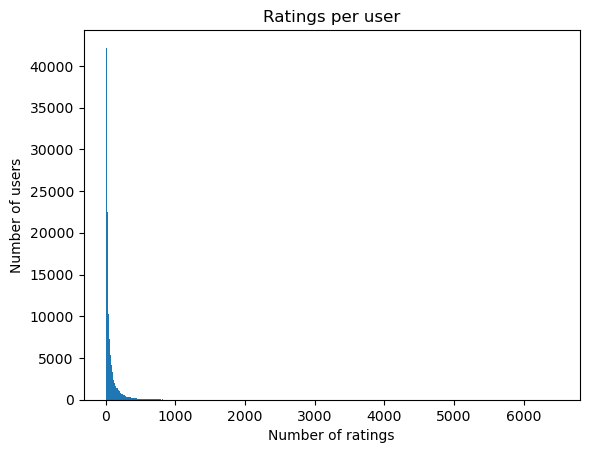

In [3]:
#number of ratings per user histogram

user_ratings.rename(columns={'Rating' : 'Ratings per user'}, inplace=True)
gb = user_ratings.groupby(by=user_ratings['Username'], as_index=False)
a = gb.count().sort_values(by='Ratings per user', ascending=False)
hist = a.hist(column='Ratings per user', bins=1000, sharex=True, sharey=True, grid=False)
for ax in hist.flatten():
    ax.set_ylabel("Number of users")
    ax.set_xlabel("Number of ratings")
    
user_ratings.rename(columns={'Ratings per user' : 'Rating'}, inplace=True)

In [4]:
subcategories = pd.read_csv( "C:\\Users\\S1629\\Desktop\\Docs\\school\\mgr\PV254\\subcategories.csv",)
no_cat = subcategories[
    subcategories['Exploration'] +
    subcategories['Miniatures'] +
    subcategories['Card Game'] +
    subcategories['Territory Building'] +
    subcategories['Educational'] +
    subcategories['Puzzle'] +
    subcategories['Collectible Components'] +
    subcategories['Word Game'] +
    subcategories['Print & Play'] +
    subcategories['Electronic']
    == 0]
no_cat.drop(['Exploration','Miniatures','Card Game','Territory Building','Educational','Puzzle','Collectible Components','Word Game','Print & Play','Electronic'], axis=1)
print('Number of games with no category:', len(no_cat), '(', round(100*len(no_cat)/len(subcategories),2), '% )')

Number of games with no category: 11892 ( 54.24 % )


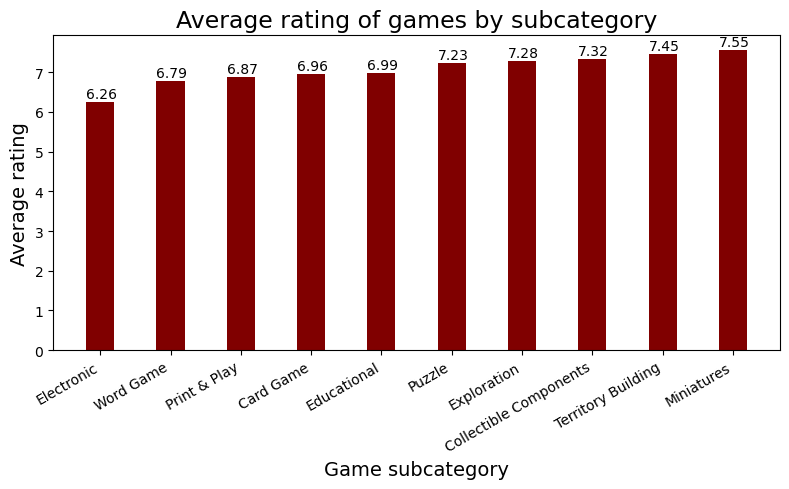

In [5]:
#average rating per subcategory barplot

rat_cat = {}
for col in ['Exploration','Miniatures','Card Game',
            'Territory Building','Educational','Puzzle',
            'Collectible Components','Word Game','Print & Play','Electronic']:
    cat = subcategories[subcategories[col] == 1]
    rat = user_ratings[user_ratings['BGGId'].isin(cat['BGGId'])]
    rat_cat.update({col : round(rat['Rating'].mean(), 2)})
    
rat_cat = dict(sorted(rat_cat.items(), key= lambda x:x[1]))
cat = list(rat_cat.keys())
rat = list(rat_cat.values())

fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(cat, rat, color ='maroon', width = 0.4)
plt.xlabel("Game subcategory", size=14)
plt.ylabel("Average rating", size=14)
plt.xticks(rotation=30, ha= 'right')
plt.title("Average rating of games by subcategory", size=17)

for index, data in enumerate(rat):
    plt.text(x=index-0.2, y=data+0.1 , s=f"{data}" , fontdict=dict(fontsize=10))
    plt.tight_layout()

plt.show()

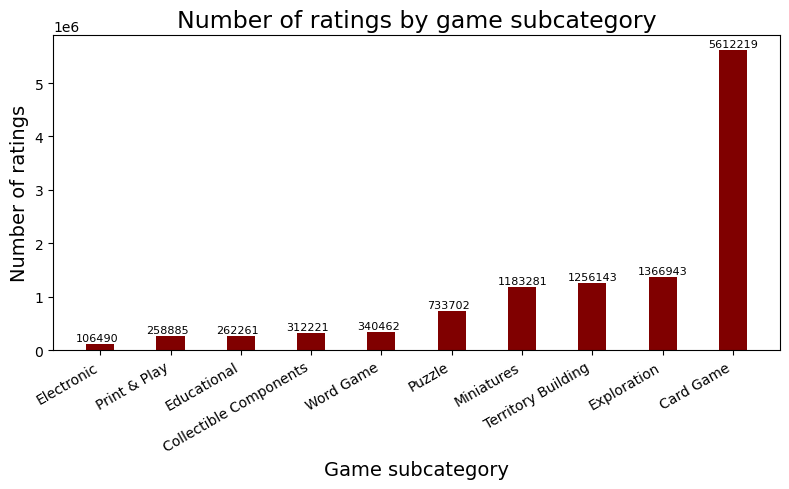

In [6]:
#number of ratings per subcategory barplot

num_cat = {}
for col in ['Exploration','Miniatures','Card Game',
            'Territory Building','Educational','Puzzle',
            'Collectible Components','Word Game','Print & Play','Electronic']:
    cat = subcategories[subcategories[col] == 1]
    rat = user_ratings[user_ratings['BGGId'].isin(cat['BGGId'])]
    rat_cat.update({col : len(rat['Rating']) })
    
rat_cat = dict(sorted(rat_cat.items(), key= lambda x:x[1]))
cat = list(rat_cat.keys())
rat = list(rat_cat.values())

fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(cat, rat, color ='maroon', width = 0.4)
plt.xlabel("Game subcategory", size=14)
plt.ylabel("Number of ratings", size=14)
plt.xticks(rotation=30, ha= 'right')
plt.title("Number of ratings by game subcategory", size=17)

for index, data in enumerate(rat):
    plt.text(x=index-0.35, y=data+60000 , s=f"{data}" , fontdict=dict(fontsize=8))
    plt.tight_layout()

plt.show()

In [9]:
n_games = len(subcategories)
n_users = user_ratings['Username'].nunique()
n_ratings = len(user_ratings)
rating_density = n_ratings / (n_games * n_users)
print('Number of ratings:', n_ratings)
print('Number of distinct games:', n_games)
print('Number of distinct users:', n_users)
print('Density of rating:', rating_density)

Number of ratings: 18340284
Number of distinct games: 21925
Number of distinct users: 224556
Density of rating: 0.0037251330653188313
